#상관(Correlation) 분석

* 상관분석: 두 변수의 선형 관계를 분석하는 방법

* 타이타닉호의 **생존자**와 **관련된 변수**의 상관관계를 찾아봄
* 생존과 가장 상관도가 높은 변수는 무엇인지 분석
* 상관 분석을 위해 피어슨 상관 계수를 사용
* 변수 간의 상관관계는 시각화하여 분석


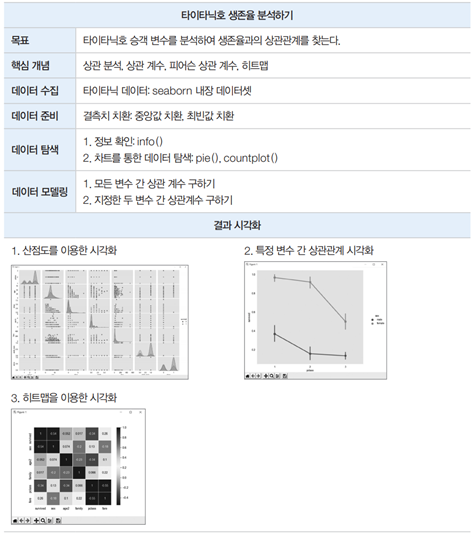

In [1]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset("titanic")

 * matplotlib으로도 대부분의 시각화는 가능하지만 아래와 같은 이유들로 seaborn도 많이 쓰임

  1. seaborn에서만 제공되는 통계 기반 plot
  2. 특별하게 꾸미지 않아도 깔끔하게 구현되는 기본 color
  3. 더 아름답게 그래프 구현이 가능한 palette 기능
  4. pandas 데이터프레임과 높은 호환성
  : hue 옵션으로 bar 구분이 가능하며, xtick, ytick, xlabel, ylabel, legend 등이 추가적인 코딩 작업없이 자동으로 세팅된다.

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.head(2).T

,0,1
survived,0,1
pclass,3,1
sex,male,female
age,22.0,38.0
sibsp,1,1
parch,0,0
fare,7.25,71.2833
embarked,S,C
class,Third,First
who,man,woman


In [5]:
#데이터의 기초 통계 요약
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


* 전체 샘플의 수: 891개이고 속성은 15개
* attribute/feature/column
 - pclass, class: 객실 등급
 - sibsp: 함께 탑승한 형제자매와 배우자 수
 - parch: 함께 탑승한 부모/자식 수
 - embarked, embark_town: 탑승 항구
 - adult_male: 성인 남자 여부
 - alone: 동행 여부를 True/False로 나타냄


* 데이터 준비: 결측치를 파악하고 이를 보완하는 방법을 수행
   - 1) 중간값을 넣는다
   - 2) 최빈값을 넣는다
   - 3) 아니면 변수(칼럼, 피처)를 사용하지 않고 제거한다

In [7]:
# Check Missing data 결측치를 확인하는 함수
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

c.f.） 함수설명 －
Pandas.isnull(obj)
https://pandas.pydata.org/docs/reference/api/pandas.isnull.html


* 배열과 같은 오브젝트에 누락된 값을 탐지하는 함수





* isnull() 함수 수행 결과 이 데이터에는 결측치가 있음
  * age, embarked, deck, embark_town에 결측치 존재
  * 데이터에 결측치가 있을때 이를 보정해야 할 필요가 있음.
  * 보정하는 방법은 다양하며 아래는 여러 예들을 보여주고 있음

* 값을 채울때 중간값을 구해서 채워넣는 방법

In [8]:
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [9]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())  # age의 median 값을 구해서 Na 값을 채워넣음
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

* 일괄적으로 특정 값으로 채워넣는 방법

In [10]:
#가장 많은 값을 찾기 위해 각 범주별 데이터의 통계를 파악
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
titanic['embarked'] = titanic['embarked'].fillna('S') # embark은 일괄적으로 'S'으로 채워넣음
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton') # embarked_town은 일괄적으로 'Southampton'으로 채워넣음


In [12]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [13]:
titanic['deck'] = titanic['deck'].fillna('C') # deck는 일괄적으로 'C'로 채워넣음
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

* 데이터 기본정보 탐색

-------------------------
# 차트로 데이터 시각적 탐색


In [14]:
# 관련성을 보고자(예측하고자) 하는 y의 값으로 사용될 종속변수(i.e., 'survived')를 탐색
titanic['survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [15]:
#  survided feature의 unique한 값과 그 count를 보고자 함
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

* 샘플 891명 중에서 생존자는 342명이고 사망자는 549명

* 다른 feature(column)을 사용하여 한정된 조건으로 보고 싶을때의 예제
  - [titanic['sex'] == 'male']

In [16]:
titanic['survived'][titanic['sex'] == 'male']

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: survived, Length: 577, dtype: int64

In [17]:
titanic['survived'][titanic['sex'] == 'male'].value_counts()

survived
0    468
1    109
Name: count, dtype: int64

In [18]:
type(titanic['survived'][titanic['sex'] == 'male'].value_counts())

pandas.core.series.Series

# 차트를 그려 데이터를 시각적으로 탐색하기
* 남자/여자 생존자를 파이차트로 그리기

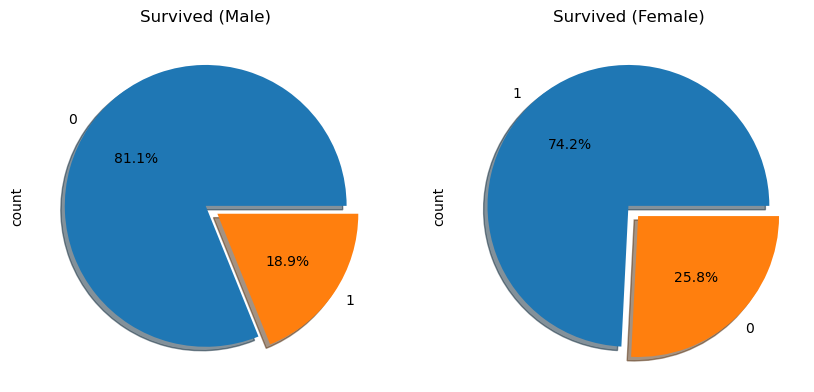

In [19]:
import matplotlib.pyplot as plt

# subplots: 여러개의 그래프를 보여줄때 쓰는 함수
#서브플롯 생성 (1행 2열)
f,ax = plt.subplots(1,2, figsize = (10, 5))  # 1행,2열의 서브플롯 생성, f는 전체 그림, ax는 서브플롯을 나타내는 배열임, figsize로 그림의 크기 조정

#각 서브플롯에 데이터 그리기
#matplotlib의 pie 함수를 사용 ()

titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True) # 남자승객 생존율
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True) # 여자승객 생존율

# 주의: 여기서 Series.plot.pie(...)는 matplotlib.pyplot.pie(...)를 내부적으로 호출하는 래퍼(wrapper)


ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

#차트를 화면에 출력
plt.show()



* plt.pie() 함수는 파이 차트를 생성합니다.
    - sizes: 각 조각의 크기 리스트.
    - explode: 각 조각의 분리 정도.
    - labels: 각 조각의 레이블.
    - colors: 각 조각의 색상.
    - autopct: 조각의 비율을 백분율로 표시하는 형식.
    - shadow: 그림자를 추가하여 차트의 입체감을 줍니다.
    - startangle: 차트를 그릴 때 시작하는 각도입니다

* matplotlib subplots
   - 공식홈페이지 함수 설명: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
   - subplots과 subplot 차이: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=heygun&logNo=221520454294

* matplotlib pie 차트 https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

  * Parameters (https://ehclub.net/677)
    - explode (array-like, default: None) : 각 항목을 파이의 원점에서 튀어 나오는 정도

        If not None, is a len(x) array which specifies the fraction of the radius with which to offset each wedge.

    - autopct (None or str or callable, default: None) : 각 항목의 퍼센트를 표시
    
        If not None, is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt % pct. If it is a function, it will be called.
  * Return 값
    - subplots()에선 두개의 값을 받을 수 있는데 figure 와 axes 값을 받을 수 있다. 여기서 변수명은 상관없다. 순서가 중요하다
   - fig란 figure로써 전체 subplot을 말한다. ex) 서브플로안에 몇개의 그래프가 있던지 상관없이  그걸 담는 하나.  전체 사이즈를 말한다.
    - ax는 axe로써 전체 중 낱낱개를 말한다 ex) 서브플롯 안에 2개(a1,a2)의 그래프가 있다면 a1, a2 를 일컬음

# 등급별 생존자 수를 차트로 나타내기
* seaborn 의 countplot:  countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

 - 범주형 데이터 개수를 세어 시각화 할때 유용함

  - countplot: http://seaborn.pydata.org/generated/seaborn.countplot.html

  - sns.countplot(x="day", data=tips)은 "day" 열의 각 값에 대한 빈도를 세어 막대 그래프로 표시합니다.
     - x 매개변수는 X축에 표시할 열을 지정합니다.
     - data 매개변수는 사용할 데이터프레임을 지정합니다.

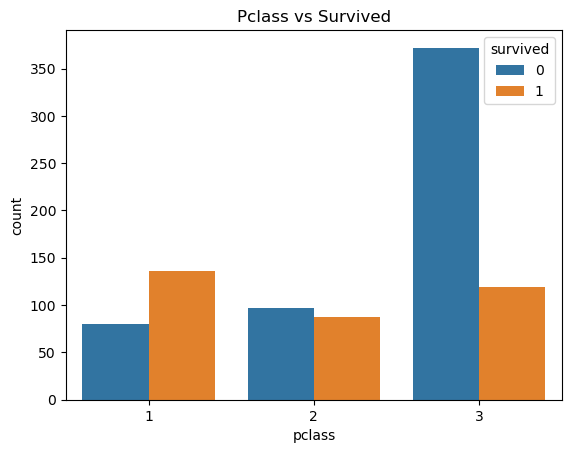

In [20]:
# x = pclass 유형 1,2,3을 x축에 나타냄
# hue 색상을 카태고리로 나누기  survived =0과 survived =1의 개수를 계산하여 y축으로 하는 countplot을 설정(색상을 다르게 표현함)
# 그래프의 x 축 이름 'pclass', data- 대상이 되는 데이터프레임,
sns.countplot(x='pclass', hue = 'survived', data = titanic)

plt.title('Pclass vs Survived')
plt.show()

* (분석) 차트설명
 - 생존자는 1등급에서 가장 많음
 - 사망자는 3등급에서 월등히 많음

-------------------
# 상관분석을 위한 상관계수 구하기
* Pandas에서는 dataframe의 attribute간 상관관계(pearson correlation)을 구할수 있는 함수를 제공하고 있음

  -  DataFrame 객체의 corr 메소드를 사용하여 데이터프레임의 열 간 상관관계를 쉽게 계산할 수 있음

  - DataFrame.corr(method='pearson', min_periods=1): corr 메소드는 'pearson', 'kendall', 'spearman' 등 다양한 상관계수

   Compute pairwise correlation of columns, excluding NA/null values.
  - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [21]:
#titanic_numeric = titanic.select_dtypes(include=['number'])
titanic_numeric = titanic.select_dtypes(include=['number'])

# df.select_dtypes: 데이터 타입에 따라 데이터프레임의 subset을 추출
# 여기서는 숫자값을 가지고 있는 column들을 포함하는 subset을 추출

In [22]:
titanic_corr = titanic_numeric.corr(method = 'pearson') #pearson 상관계수 구하기
#titanic_corr.to_csv('titanic_corr.csv', index = False) 결과의 파일 저장 가능
titanic_corr

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


* 결과 해석
  - 남자 성인(adult_male) - 생존(survived): 음의 상관관계(-0.55)
  - 객실 등급(pclass) - 생존(survived) : 약한 음의 상관(-0.33)
  - 관계, 객실 요금fare - 생존(survived): 약한 양의 상관관계(0.25)
  - 동행 없이 혼자 탑승한 경우(alone) - 생존(survived): 약한 음의 상관관계 (-0.2)생존율이 떨어진다는 상관관계


In [23]:
titanic['survived'].corr(titanic['adult_male']) # 특정 변수간의 상관계수 구하기

np.float64(-0.5570800422053259)

In [24]:
titanic['survived'].corr(titanic['fare'])

np.float64(0.2573065223849622)

# 변수간 상관관계를 히트맵으로 시각화 하기
* heatmap (히트맵)
  - 데이터의 행과 열간의 관계를 시각화 하는데 유용한 도구
  - 상관관계, 데이터 강도를 색상으로 표현하는데 사용
  - http://seaborn.pydata.org/generated/seaborn.heatmap.html
    

* 변수 전처리
  - 나이를 구간으로 : 10대, 20대..
  - 성별을 1/0으로 치환
  - 가족수 전체로 계산: sibsp + parch

In [25]:
# 변수사이의 상관계후를 히트맵으로 시각화

#10살 단위로 등급을 나누어 0~7의 값으로 바꿔주는 category_age 함수를 작성
def category_age(x):
        if x < 10:
           return 0
        elif x < 20:
           return 1
        elif x < 30:
           return 2
        elif x < 40:
           return 3
        elif x < 50:
           return 4
        elif x < 60:
           return 5
        elif x < 70:
           return 6
        else:
           return 7

In [26]:
titanic['age2'] = titanic['age'].apply(category_age) # category_age 함수를 적용하여 새로운 age2 열을 만들어 추가
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0}) #성별을 male/female에서 1/0으로 치환
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1 #가족수 계산 및 family 열 추가

In [27]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1


In [28]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']] #hitmap에 그릴 변수 추출
heatmap_data.head()

,survived,sex,age2,family,pclass,fare
0,0,1,2,2,3,7.2500
1,1,0,3,2,1,71.2833
2,1,0,2,1,3,7.9250
3,1,0,3,2,1,53.1000
4,0,1,3,1,3,8.0500


- heatmap 생성
 - sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
   - annot: 각 셀에 값 표시
   - cmap: 색상맵 컬러 변경
   - vmin/vmax: 색상의 최소/최대값 설정
   - linewidths와 linecolor: 셀간 경계선 설정
   - cbar: color bar 표현 여부

<Axes: >

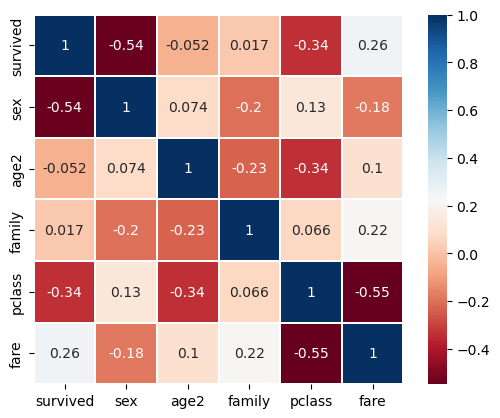

In [29]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']] #hitmap에 그릴 변수 추출
colormap = plt.cm.RdBu #히트맵 컬러맵 지정

# corr()함수로 구한 상관계수로 히트맵 생성
sns.heatmap(heatmap_data.astype(float).corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = 'white',
            annot = True,
            annot_kws = {"size": 10})

<Axes: >

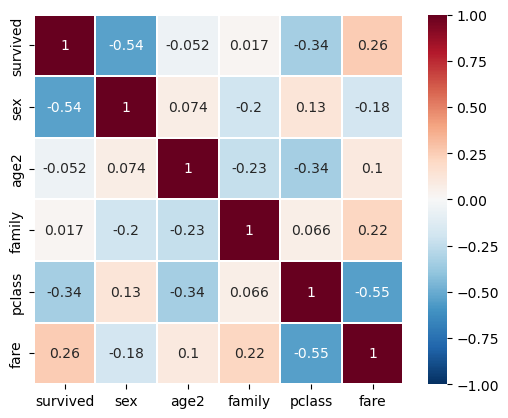

In [30]:
# 위 시각화 결과는 두 변수들 간의 상관관계를 표현하고 있으나, 색의 분포를 조금만 더 조정하면 보다 분석에 용이한 형태로 개선할 수 있음
# 
sns.heatmap(heatmap_data.astype(float).corr(),
            linewidth = 0.1,
            vmax = 1.0,
            vmin = -1.0,      # 상관계수의 변화 범위 재지정
            square = True,
            cmap = colormap.reversed(),  # colormap내 색상의 순서를 역순으로.
            linecolor = 'white',
            annot = True,
            annot_kws = {"size": 10}) 